In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Dataset

In [2]:
df = pd.read_csv('netflix.csv')

# 1. Defining Problem Statement and Analysing basic metrics

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Basic analysis of the dataset and defining problems.
1. The first thing we can observe from our data is that the Director, cast, country, release year, date_added has several missing values.
2. We can also see that a lot of columns have more than 1 value (nested columns) for example - Director column has several values because more than 1 director has worked on a movie or a tv show.
3. Cast column also has more than 1 value because several actors have worked in a movie/tv show.
4. We can see that Country and Listed_in columns have several values as well. So we will have to un-nest these columns to make them usefull.

# 2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

In [4]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [5]:
df.shape

(8807, 12)

In [6]:
(df.isna().sum())/len(df)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Observations
1. From the shape of the data, we can see that the data has 8807 rows and 12 columns.
2. All the columns are of object datatype except the release_year which is of int datatype.
3. We will have to convert the date_added to datetime datatype so that we can extract the months and years from it for further analysis.
4. We will have to un-nest the categorical features like - Director, Cast, Country and Listed_in which has more than 1 value in their respective columns. Doing this will allow us to categorize or group the data to generate much better insights.
5. The Director column has almost 29% of the missing values whereas Cast and Country have almost 9% of the missing values. Which is a signification part of our data, so we can't just remove these rows. We will need to impute these values.

# 3. Non-Graphical Analysis: Value counts and unique attributes

In [8]:
df.describe(include = 'object').T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


### Observations:
1. From the above table, we can see that the show_id and title column are the only two columns that are unique in our dataset. We can use these two to index our tables.
2. The type column have the type of content netflix shows, that is - Movies and TV shows. From the above table, we can see that the we have more movie data than the TV shows.
3. We can see that the director column has 4528 unique values, that is because there are more than 1 directors working in a show or a movie and also, 1 director can work on multiple other movies or shows.
4. We can also see that the United States is occuring the majority of the time in country column.

# 4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

## Pre-processing the data 

### Unnesting the Cast Data

In [9]:
constraint = df['cast'].apply(lambda x:str(x).split(', ')).tolist()

df_new_cast = pd.DataFrame(constraint, index = df['title'])

df_new_cast = df_new_cast.stack()

df_new_cast = pd.DataFrame(df_new_cast)

df_new_cast.reset_index(inplace = True)

df_new_cast = df_new_cast[['title', 0]]

df_new_cast.columns = ['title', 'cast']


### Unnesting the Director data

In [10]:
constraint = df['director'].apply(lambda x:str(x).split(', ')).tolist()

df_new_directors = pd.DataFrame(constraint, index = df['title'])

df_new_directors = df_new_directors.stack()

df_new_directors = pd.DataFrame(df_new_directors)

df_new_directors.reset_index(inplace = True)

df_new_directors = df_new_directors[['title',0]]

df_new_directors.columns = ['title','director']

### Unnesting the country data

In [13]:
constraint = df['country'].apply(lambda x:str(x).split(', ')).tolist()

df_new_country = pd.DataFrame(constraint, index = df['title'])

df_new_country = df_new_country.stack()

df_new_country = pd.DataFrame(df_new_country)

df_new_country.reset_index(inplace = True)

df_new_country = df_new_country[['title',0]]

df_new_country.columns = ['title','country']

### Unnesting the listed_in data

In [14]:
constraint = df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()

df_new_listed = pd.DataFrame(constraint, index = df['title'])

df_new_listed.reset_index(inplace = True)

df_new_listed.columns = ['title','listed1','listed2','listed3']

### Mergings these tables

In [15]:
t1 = df_new_cast.merge(df_new_directors, on = 'title', how = 'inner')

t2 = t1.merge(df_new_country, on = 'title', how = 'inner')

df_final = t2.merge(df_new_listed, on = 'title', how = 'inner')

df_final = df_final.merge(df,on = 'title', how = 'inner')


In [16]:
df_final = df_final.drop(['director_y', 'cast_y', 'country_y', 'listed_in'], axis = 1)

In [17]:
df_final.rename({'cast_x':'cast','country_x':'country','director_x':'director'}, axis = 1,inplace = True)

df_final.replace('nan',np.nan, inplace = True)

In [18]:
#Extracting name of the month and storing in a column

df_final['date_added'] = pd.to_datetime(df_final['date_added'])

df_final['month'] = df_final['date_added'].dt.month_name()

df_final['year'] = df_final['date_added'].dt.year


In [19]:
tv_shows = df_final[df_final['type'] == 'TV Show']

movies = df_final[df_final['type'] == 'Movie']

In [20]:
(df_final.isna().sum())/len(df_final)*100

title            0.000000
cast             1.331364
director        24.542973
country          6.064980
listed1          0.000000
listed2         18.580922
listed3         55.432861
show_id          0.000000
type             0.000000
date_added       0.077197
release_year     0.000000
rating           0.042514
duration         0.003356
description      0.000000
month            0.077197
year             0.077197
dtype: float64

In [21]:
type_release_count = df_final.groupby(['release_year','type'])[['type']].count()

type_release_count.rename({'type':'type_count'}, axis = 1, inplace = 'True')

type_release_count = type_release_count.reset_index()

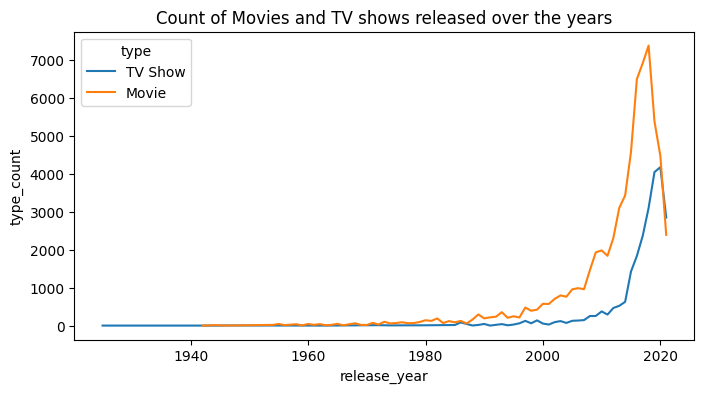

In [22]:
plt.figure(figsize = (8,4))
sns.lineplot(data = type_release_count, x = 'release_year', y = 'type_count', hue = 'type')
plt.title('Count of Movies and TV shows released over the years')
plt.show()

In [23]:
type_counts = pd.DataFrame(df_final['type'].value_counts()).reset_index()

type_counts.rename({'index':'type','type':'count'},axis = 1, inplace = True)

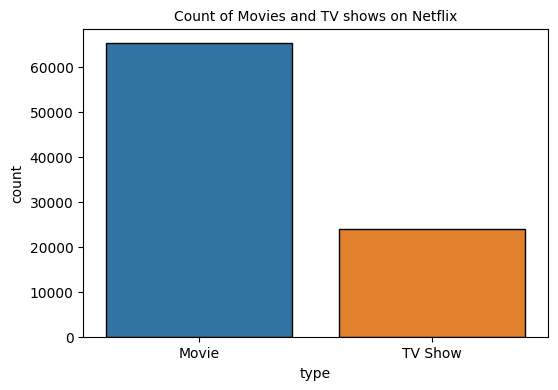

In [24]:
plt.figure(figsize = (6,4))
sns.barplot(data = type_counts, x = 'type',y = 'count', edgecolor = 'black')
plt.title('Count of Movies and TV shows on Netflix', fontsize = 10)
plt.show()

In [23]:
tv_shows_month = pd.DataFrame(tv_shows.groupby(['title','month'])['month'].nunique())

tv_shows_month.drop('month', axis = 1, inplace = True)

tv_shows_month = tv_shows_month.reset_index()

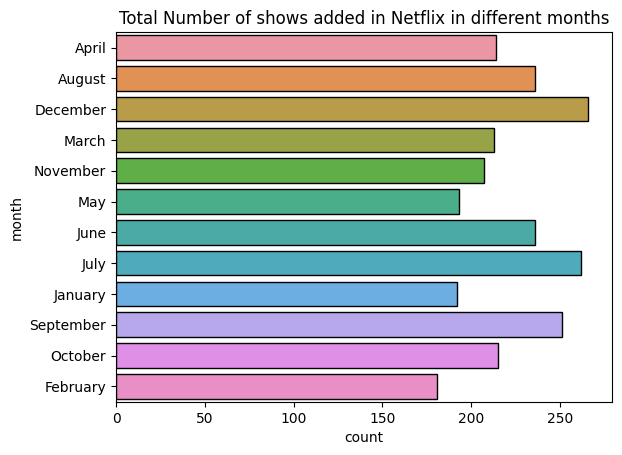

In [24]:
sns.countplot(data = tv_shows_month, y = 'month', edgecolor = 'black')
plt.title('Total Number of shows added in Netflix in different months', fontsize = 12)
plt.show()

In [25]:
(tv_shows_month['month'].value_counts())/len(tv_shows_month)*100

December     9.977494
July         9.827457
September    9.414854
August       8.852213
June         8.852213
October      8.064516
April        8.027007
March        7.989497
November     7.764441
May          7.239310
January      7.201800
February     6.789197
Name: month, dtype: float64

In [26]:
ten_years = df_final[(df_final['year'] > 2011) & (df_final['year'] <= 2021)]
ten_years['year'] = ten_years['year'].astype('int64')

/var/folders/gc/qpf88__d0dl785k0jz20snmw0000gn/T/ipykernel_28476/1630859898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ten_years['year'] = ten_years['year'].astype('int64')


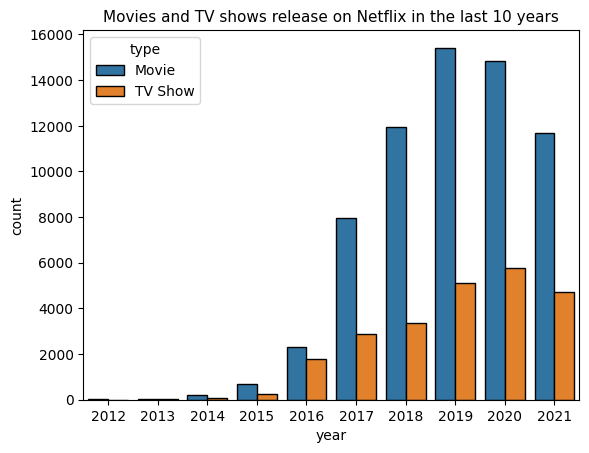

In [27]:
sns.countplot(data = ten_years, x = 'year', hue = 'type', edgecolor = 'black')
plt.title('Movies and TV shows release on Netflix in the last 10 years', fontsize = 11)
plt.show()

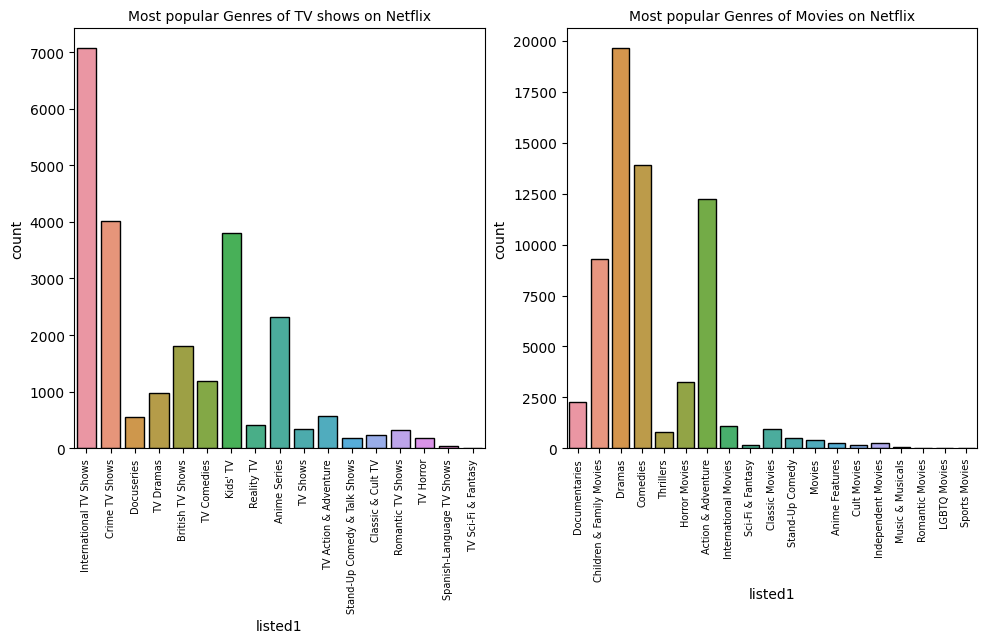

In [28]:
plt.figure(figsize = (18,12))

plt.subplot(2,3,1)
sns.countplot(data = tv_shows, x = 'listed1', edgecolor = 'black')
plt.xticks(rotation = 90, fontsize = 7)
plt.title('Most popular Genres of TV shows on Netflix', fontsize = 10)

plt.subplot(2,3,2)
sns.countplot(data = movies, x = 'listed1', edgecolor = 'black')
plt.xticks(rotation = 90, fontsize = 7)
plt.title('Most popular Genres of Movies on Netflix', fontsize = 10)

plt.show()

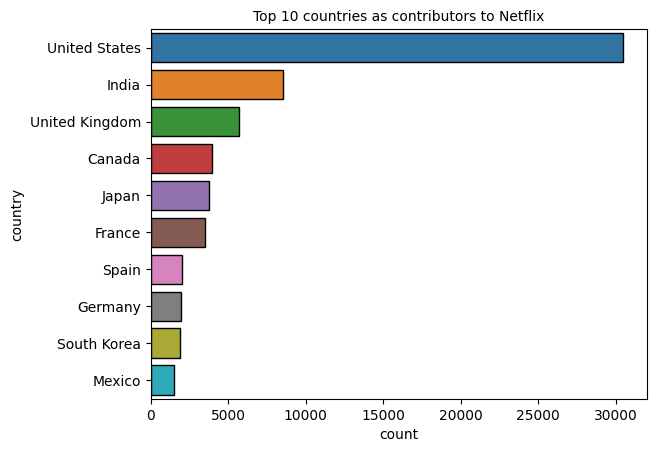

In [29]:
top10_country = pd.DataFrame(df_final['country'].value_counts()[:10]).reset_index()

top10_country.rename({'index': 'country', 'country':'count'}, inplace = True, axis = 1)


sns.barplot(data = top10_country, x = 'count', y = 'country', edgecolor = 'black')
plt.title('Top 10 countries as contributors to Netflix', fontsize = 10)
plt.show()

In [30]:
movie = df_final[df_final['type']== 'Movie']

movie_group = movie.groupby(['director','title'])[['title']].nunique()

movie_group.rename({'title':'count'}, axis = 1, inplace = True)

movie_group = movie_group.reset_index()

top10_directors = pd.DataFrame(movie_group['director'].value_counts()[:10]).reset_index()

top10_directors.rename({'index':'director','director':'count'},axis = 1, inplace = True)

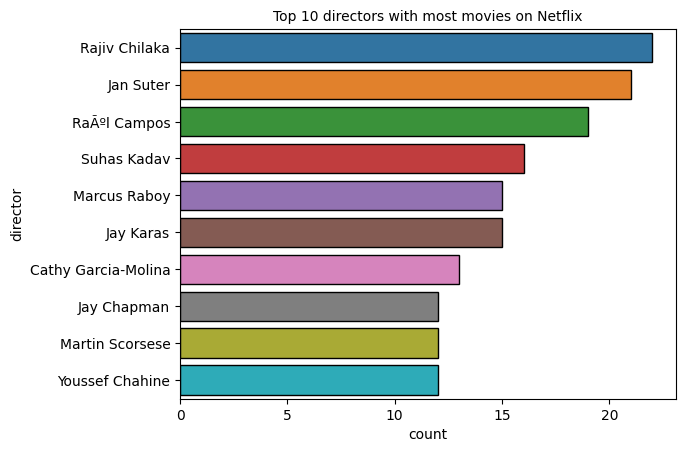

In [31]:
sns.barplot(data = top10_directors, x = 'count', y = 'director', edgecolor = 'black')
plt.title('Top 10 directors with most movies on Netflix', fontsize = 10)
plt.show()


In [32]:
top10_directors_shows = df_final[df_final['type'] == 'TV Show'].groupby(['director','title'])[['title']].nunique()

top10_directors_shows.rename({'title':'count'},axis = 1, inplace = True)

top10_directors_shows = top10_directors_shows.reset_index()

top10_directors_shows = pd.DataFrame(top10_directors_shows['director'].value_counts()[:10]).reset_index()

top10_directors_shows.rename({'index':'director','director':'count'}, axis = 1, inplace = True)

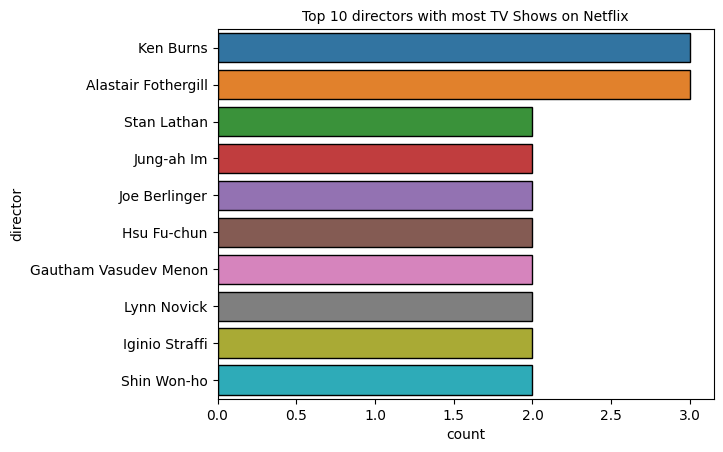

In [33]:
sns.barplot(data = top10_directors_shows, x = 'count', y = 'director', edgecolor = 'black')
plt.title('Top 10 directors with most TV Shows on Netflix', fontsize = 10)
plt.show()


In [34]:
cast_count_movies = pd.DataFrame(movie.groupby(['title','cast'])['cast'].nunique())

cast_count_movies.rename({'cast':'count'}, axis = 1, inplace = True)

cast_count_movies = cast_count_movies.reset_index()

top10_cast_movies = pd.DataFrame(cast_count_movies['cast'].value_counts()[:10]).reset_index()

top10_cast_movies.rename({'index':'cast','cast':'count'},axis = 1, inplace = True)


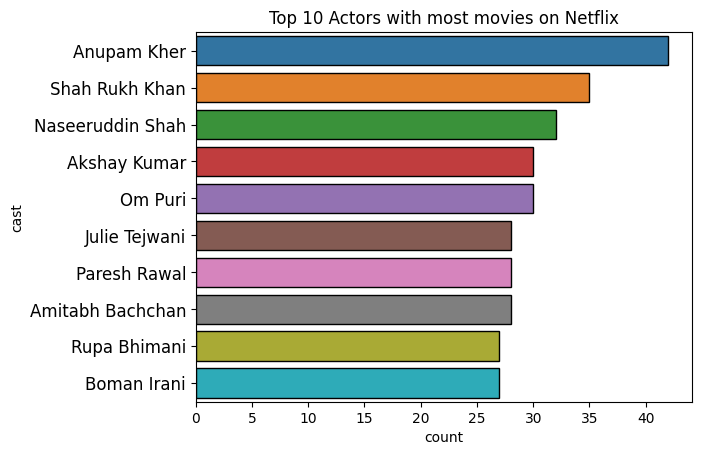

In [35]:
sns.barplot(data = top10_cast_movies, x = 'count', y = 'cast', edgecolor = 'black')
plt.yticks(fontsize = 12)
plt.title('Top 10 Actors with most movies on Netflix', fontsize = 12)
plt.show()


In [36]:
tv_shows = df_final[df_final['type'] == 'TV Show']

cast_count_shows = pd.DataFrame(tv_shows.groupby(['title','cast'])['cast'].nunique())

cast_count_shows.rename({'cast':'count'}, axis = 1, inplace = True)

cast_count_shows = cast_count_shows.reset_index()

top10_cast_shows = pd.DataFrame(cast_count_shows['cast'].value_counts()[:10]).reset_index()

top10_cast_shows.rename({'index':'cast','cast':'count'},axis = 1, inplace = True)

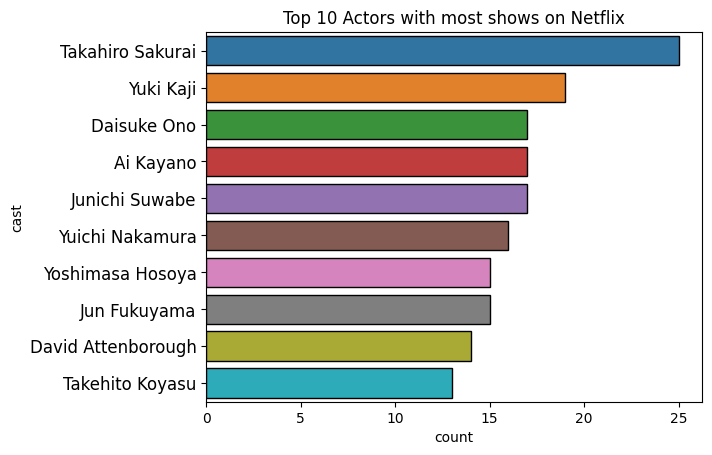

In [37]:
sns.barplot(data = top10_cast_shows, x = 'count', y = 'cast', edgecolor = 'black')
plt.yticks(fontsize = 12)
plt.title('Top 10 Actors with most shows on Netflix', fontsize = 12)
plt.show()

In [38]:
movies['duration'] = movies['duration'].str.replace(' min','')

movies['duration'] = movies['duration'].fillna(0)

movies['duration'] = movies['duration'].astype('int64')

duration_movies = movies['duration']

/var/folders/gc/qpf88__d0dl785k0jz20snmw0000gn/T/ipykernel_28476/1174571026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = movies['duration'].str.replace(' min','')
/var/folders/gc/qpf88__d0dl785k0jz20snmw0000gn/T/ipykernel_28476/1174571026.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = movies['duration'].fillna(0)
/var/folders/gc/qpf88__d0dl785k0jz20snmw0000gn/T/ipykernel_28476/1174571026.py:5: SettingWithCopyWarning: 
A value is trying to be set on a cop

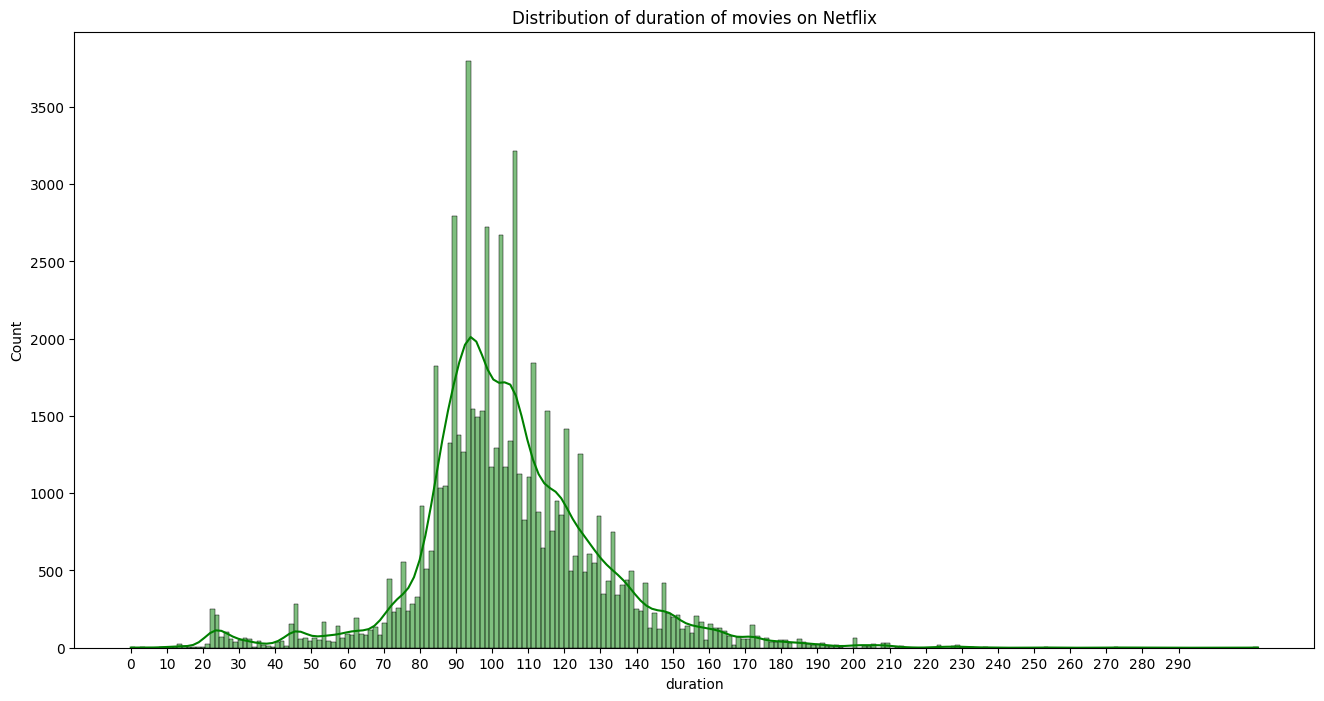

In [39]:
plt.figure(figsize = (16,8))
graph = sns.histplot(duration_movies,color = 'g', kde = True)
plt.title('Distribution of duration of movies on Netflix')
plt.xticks(range(0,300,10))
plt.show()


## 4.2 For categorical variable(s): Boxplot

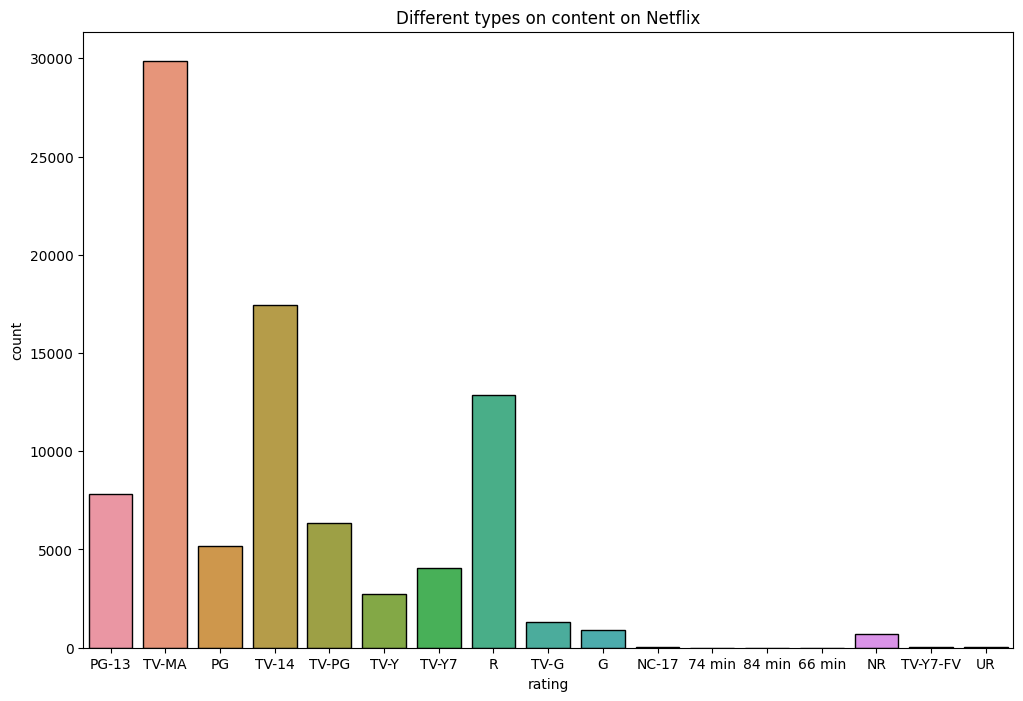

In [40]:
plt.figure(figsize = (12,8))
sns.countplot(data = df_final, x = 'rating', edgecolor = 'black')
plt.title('Different types on content on Netflix')
plt.show()

## 5. Missing Value & Outlier check

In [41]:
df_final.isna().sum()

title               0
cast             1190
director        21937
country          5421
listed1             0
listed2         16608
listed3         49547
show_id             0
type                0
date_added         69
release_year        0
rating             38
duration            3
description         0
month              69
year               69
dtype: int64

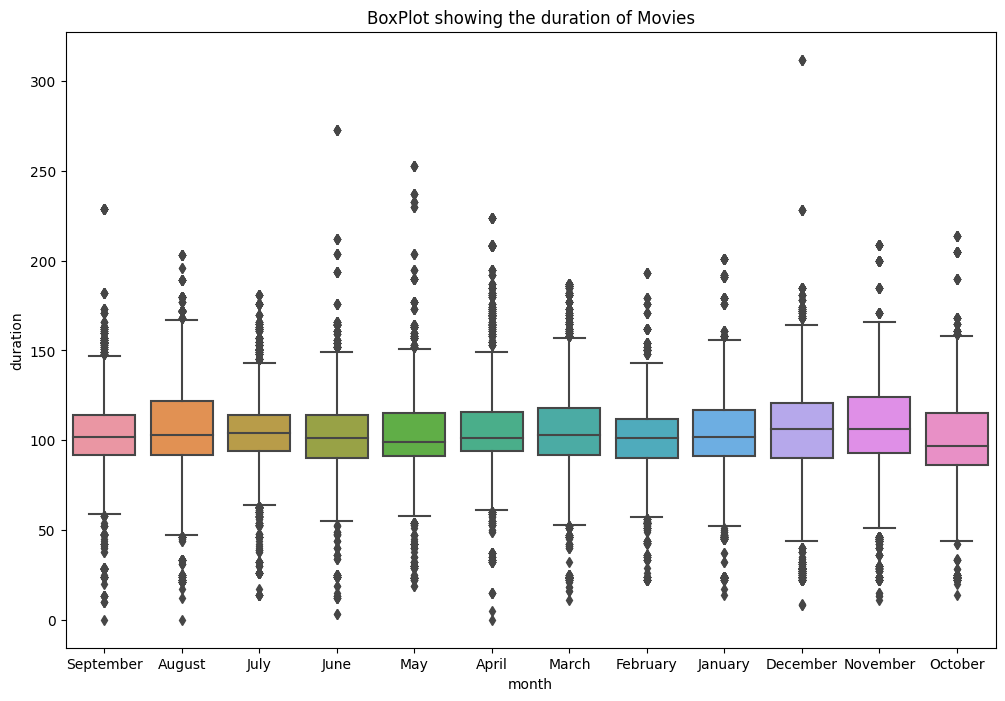

In [43]:
plt.figure(figsize = (12,8))
sns.boxplot(data = movies, x = 'month', y = 'duration')
plt.title('BoxPlot showing the duration of Movies')
plt.show()

In [44]:
df_final['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

### Observations
1. From the above Box plot, we can see that the average movie time is about 100-90 mins.
2. We can also see a few outliers, with movie duration of 200-300+ minutes duration.
3. Also there are outliers with less than 0-5 minutes of movie duration. 
4. We can also see a few outliers from the above 'rating' column, where we can see that the rating is in the minutes. Which doesn't make sense.

## 6. Insights based on Non-Graphical and Visual Analysis

### 6.1 Comments on the range of attributes



In [45]:
df.describe(include = object).T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


### Observations
1. From the above table, we can see that the show_id and title column are the only two columns that are unique in our dataset. We can use these two to index our tables.
2. The type column have the type of content netflix shows, that is - Movies and TV shows. From the above table, we can see that the we have more movie data than the TV shows.
3. We can see that the director column has 4528 unique values, that is because there are more than 1 directors working in a show or a movie and also, 1 director can work on multiple other movies or shows.
4. We can also see that the United States is occuring the majority of the time in country column.

### 6.2 Comments on the distribution of the variables and relationship between them



In [46]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89382 entries, 0 to 89381
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         89382 non-null  object        
 1   cast          88192 non-null  object        
 2   director      67445 non-null  object        
 3   country       83961 non-null  object        
 4   listed1       89382 non-null  object        
 5   listed2       72774 non-null  object        
 6   listed3       39835 non-null  object        
 7   show_id       89382 non-null  object        
 8   type          89382 non-null  object        
 9   date_added    89313 non-null  datetime64[ns]
 10  release_year  89382 non-null  int64         
 11  rating        89344 non-null  object        
 12  duration      89379 non-null  object        
 13  description   89382 non-null  object        
 14  month         89313 non-null  object        
 15  year          89313 non-null  float6

### Observations
1. We can see that the type has only 2 types of categories - Movies and TV shows. We can use these categories to generate insights about tv shows and movies on Netflix.
2. The release_year has the original release_year of the movies and tv shows while the date_added column has the date when Netflix acquired the license for these movies/shows.
3. Rating column told us about the different types on content avaible to watch on netflix.
4. listed_in tells us about differnet genres of the movies and tv shows on netflix.

# 7. Business Insights

In [47]:
(df['type'].value_counts())/len(df)*100

Movie      69.615079
TV Show    30.384921
Name: type, dtype: float64

### Insights on the Netflix Data
1. We can see that the Movies on Netflix has a higher viewerbase - 69.6% than that of the tv shows - 30.3%
2. We can also see that most of the tv shows were added mainly in December or July.
3. The most popular genres of TV shows on Netflix are - International TV shows, Crime TV shows and Kid's TV shows.
4. The most popular movie genres on Netflix are - Dramas, Comedies and Action & Adventure movies.
5. We can see that United States is the major contributor of movies and tv shows on Netflix. This makes sense because Netflix is US based company. We can see that India is the 2nd biggest contributor of tv shows and movies on Netflix.
6. We can see that the director with most movies on Netflix is - Rajiv Chilaka with more than 20+ movies on Netflix. 
7. The director with most TV shows is - Ken Burns and Alastair Fothergill with 3 tv shows each.
8. The actors with most movies on Netflix are - Anupam Kher with more than 40 movies and close second is Shah Rukh Khan with close to 35 movies on Netflix.
9. The actors with most TV shows on Netflix are - Takahiro Sakurai with 25 shows and actor with 2nd most most shows is - Yuki Kaji.
10. We can see that the average duration of movies on Netflix is 90-100 minutes.
11. We have also observed that most of the people like to watch the TV-MA content which is a content for mature audience and the 2nd most type of content watch on Netflix is - TV-14.

# 8. Recommendations

### Business Recommendations
1. Since India is the 2nd highest country with most fanbase, I think Netflix should release more movies for Indian audience because there are more oppurtunity for viewership.
2. The most popular Shows are Internation TV shows, Crime TV shows and Kid's TV shows and Netflix should release more of the same because of their higher popularity among viewers.
3. Netflix should also release more Drama, Comedy and Action/Adventure movies because they are the most viewed movie genres on Netflix.
4. Netflix should also release more of Rajiv Chilaka movies and also of Jan Suter who is the director with 2nd most movies on Netflix.
5. Netflix should release more content of Anupam Kher, Shah Rukh Khan, Takahiro Sakurai and Yuki Kaji since they are the actors with most movies and shows on Netflix.
6. Netflix should release more content for Mature audience and TV-14 content audience.